# Customer Churn Prediction (Logistic Regression) — 01_eda.ipynb

**Author:** bealljamesp  
**Date:** 2025-09-13

**Objective:** Briefly explain what this notebook accomplishes and the expected output.


In [6]:
# Standard imports
import os, sys, json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def find_project_root(start: Path, markers=("src", "data")) -> Path:
    """
    Walk up from `start` until we find a folder that contains all `markers`.
    Falls back to `start` if not found within a few levels.
    """
    p = start.resolve()
    for _ in range(6):  # walk up to 6 levels just in case
        if all((p / m).exists() for m in markers):
            return p
        p = p.parent
    return start.resolve()

# Figure out a starting point (works in notebooks and scripts)
try:
    start_here = Path(__file__).resolve()
except NameError:
    start_here = Path.cwd()

ROOT = find_project_root(start_here)
SRC = ROOT / "src"
if SRC.exists() and str(SRC) not in sys.path:
    sys.path.append(str(SRC))

print("ROOT set to:", ROOT)  # should end with ...\msaba-01-churn-prediction-logit


ROOT set to: C:\Users\beall\OneDrive\Documents\Resume\Portfolio\msaba-01-churn-prediction-logit


In [ ]:
from churn.preprocess import load_churn_data  # only import loader

df = load_churn_data(ROOT)
df.shape, df.head()


((30000, 19),
    customer_id  signup_dt  age   segment   region   plan  is_veteran  \
 0       100000 2024-10-23   59  Consumer  Central  Basic           0   
 1       100000 2024-10-23   59  Consumer  Central  Basic           0   
 2       100000 2024-10-23   59  Consumer  Central  Basic           0   
 3       100000 2024-10-23   59  Consumer  Central  Basic           0   
 4       100000 2024-10-23   59  Consumer  Central  Basic           0   
 
       month  support_calls  support_tickets  product_usage_hours  \
 0  3/1/2025              5                0            92.835435   
 1  4/1/2025              7                0            81.200638   
 2  5/1/2025              3                0            96.033043   
 3  6/1/2025              3                1            80.568979   
 4  7/1/2025              1                0            63.861343   
 
    received_promo  churned  tenure_days  tenure_months  logins_last_30d  \
 0               0        0          324           10.

In [8]:
import churn
print("churn package at:", churn.__file__)
print("SRC in sys.path?", str(SRC) in sys.path)


churn package at: C:\Users\beall\OneDrive\Documents\Resume\Portfolio\msaba-01-churn-prediction-logit\src\churn\__init__.py
SRC in sys.path? True


In [9]:
# basic overview

df.info()
df.describe().T
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               30000 non-null  int64         
 1   signup_dt                 30000 non-null  datetime64[ns]
 2   age                       30000 non-null  int64         
 3   segment                   30000 non-null  object        
 4   region                    30000 non-null  category      
 5   plan                      30000 non-null  object        
 6   is_veteran                30000 non-null  int64         
 7   month                     30000 non-null  object        
 8   support_calls             30000 non-null  int64         
 9   support_tickets           30000 non-null  int64         
 10  product_usage_hours       30000 non-null  float64       
 11  received_promo            30000 non-null  int64         
 12  churned           

,customer_id,signup_dt,age,segment,region,plan,is_veteran,month,support_calls,support_tickets,product_usage_hours,received_promo,churned,tenure_days,tenure_months,logins_last_30d,avg_session_min,support_tickets_last_90d,nps_score
0,100000,2024-10-23,59,Consumer,Central,Basic,0,3/1/2025,5,0,92.835435,0,0,324,10.8,0,0,0,0
1,100000,2024-10-23,59,Consumer,Central,Basic,0,4/1/2025,7,0,81.200638,0,0,324,10.8,0,0,0,0
2,100000,2024-10-23,59,Consumer,Central,Basic,0,5/1/2025,3,0,96.033043,0,0,324,10.8,0,0,0,0
3,100000,2024-10-23,59,Consumer,Central,Basic,0,6/1/2025,3,1,80.568979,0,0,324,10.8,0,0,0,0
4,100000,2024-10-23,59,Consumer,Central,Basic,0,7/1/2025,1,0,63.861343,0,0,324,10.8,0,0,0,0


In [10]:
print(df.columns.tolist())
df.head()



['customer_id', 'signup_dt', 'age', 'segment', 'region', 'plan', 'is_veteran', 'month', 'support_calls', 'support_tickets', 'product_usage_hours', 'received_promo', 'churned', 'tenure_days', 'tenure_months', 'logins_last_30d', 'avg_session_min', 'support_tickets_last_90d', 'nps_score']


,customer_id,signup_dt,age,segment,region,plan,is_veteran,month,support_calls,support_tickets,product_usage_hours,received_promo,churned,tenure_days,tenure_months,logins_last_30d,avg_session_min,support_tickets_last_90d,nps_score
0,100000,2024-10-23,59,Consumer,Central,Basic,0,3/1/2025,5,0,92.835435,0,0,324,10.8,0,0,0,0
1,100000,2024-10-23,59,Consumer,Central,Basic,0,4/1/2025,7,0,81.200638,0,0,324,10.8,0,0,0,0
2,100000,2024-10-23,59,Consumer,Central,Basic,0,5/1/2025,3,0,96.033043,0,0,324,10.8,0,0,0,0
3,100000,2024-10-23,59,Consumer,Central,Basic,0,6/1/2025,3,1,80.568979,0,0,324,10.8,0,0,0,0
4,100000,2024-10-23,59,Consumer,Central,Basic,0,7/1/2025,1,0,63.861343,0,0,324,10.8,0,0,0,0


In [11]:
from importlib import reload
import churn.preprocess as prep
reload(prep)
df = prep.load_churn_data(ROOT)
df.columns.tolist(), df["churned"].value_counts(normalize=True).round(3)


(['customer_id',
  'signup_dt',
  'age',
  'segment',
  'region',
  'plan',
  'is_veteran',
  'month',
  'support_calls',
  'support_tickets',
  'product_usage_hours',
  'received_promo',
  'churned',
  'tenure_days',
  'tenure_months',
  'logins_last_30d',
  'avg_session_min',
  'support_tickets_last_90d',
  'nps_score'],
 churned
 0    0.793
 1    0.207
 Name: proportion, dtype: float64)

Text(0.5, 1.0, 'Churn vs Non-Churn')

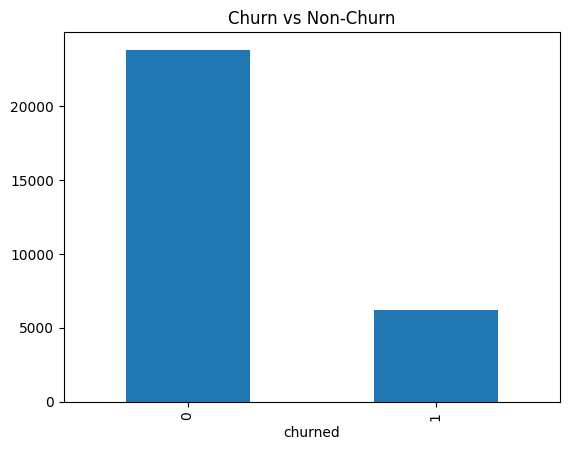

In [12]:
# churn balance
df["churned"].value_counts(normalize=True).round(3)
df["churned"].value_counts().plot(kind="bar")
plt.title("Churn vs Non-Churn")


~20% moderate imbalance

In [13]:
# dataset overview

df.info()
df.describe(include="all").T.head(20) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               30000 non-null  int64         
 1   signup_dt                 30000 non-null  datetime64[ns]
 2   age                       30000 non-null  int64         
 3   segment                   30000 non-null  object        
 4   region                    30000 non-null  category      
 5   plan                      30000 non-null  object        
 6   is_veteran                30000 non-null  int64         
 7   month                     30000 non-null  object        
 8   support_calls             30000 non-null  int64         
 9   support_tickets           30000 non-null  int64         
 10  product_usage_hours       30000 non-null  float64       
 11  received_promo            30000 non-null  int64         
 12  churned           

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
customer_id,30000.0,NaN,NaN,NaN,102499.5,100000.0,101249.75,102499.5,103749.25,104999.0,1443.399701
signup_dt,30000,NaN,NaN,NaN,2023-12-20 00:21:18.720000,2023-01-01 00:00:00,2023-06-30 18:00:00,2023-12-17 00:00:00,2024-06-13 00:00:00,2024-11-30 00:00:00,NaN
age,30000.0,NaN,NaN,NaN,47.133,18.0,32.0,47.0,62.0,77.0,17.389267
segment,30000,3,Consumer,17700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,30000,4,West,10242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan,30000,3,Basic,14880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_veteran,30000.0,NaN,NaN,NaN,0.1584,0.0,0.0,0.0,0.0,1.0,0.365122
month,30000,6,3/1/2025,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
support_calls,30000.0,NaN,NaN,NaN,4.4964,0.0,3.0,4.0,6.0,14.0,2.002046
support_tickets,30000.0,NaN,NaN,NaN,0.5101,0.0,0.0,0.0,1.0,4.0,0.680426


Text(0.5, 1.02, 'Numeric Feature Distributions')

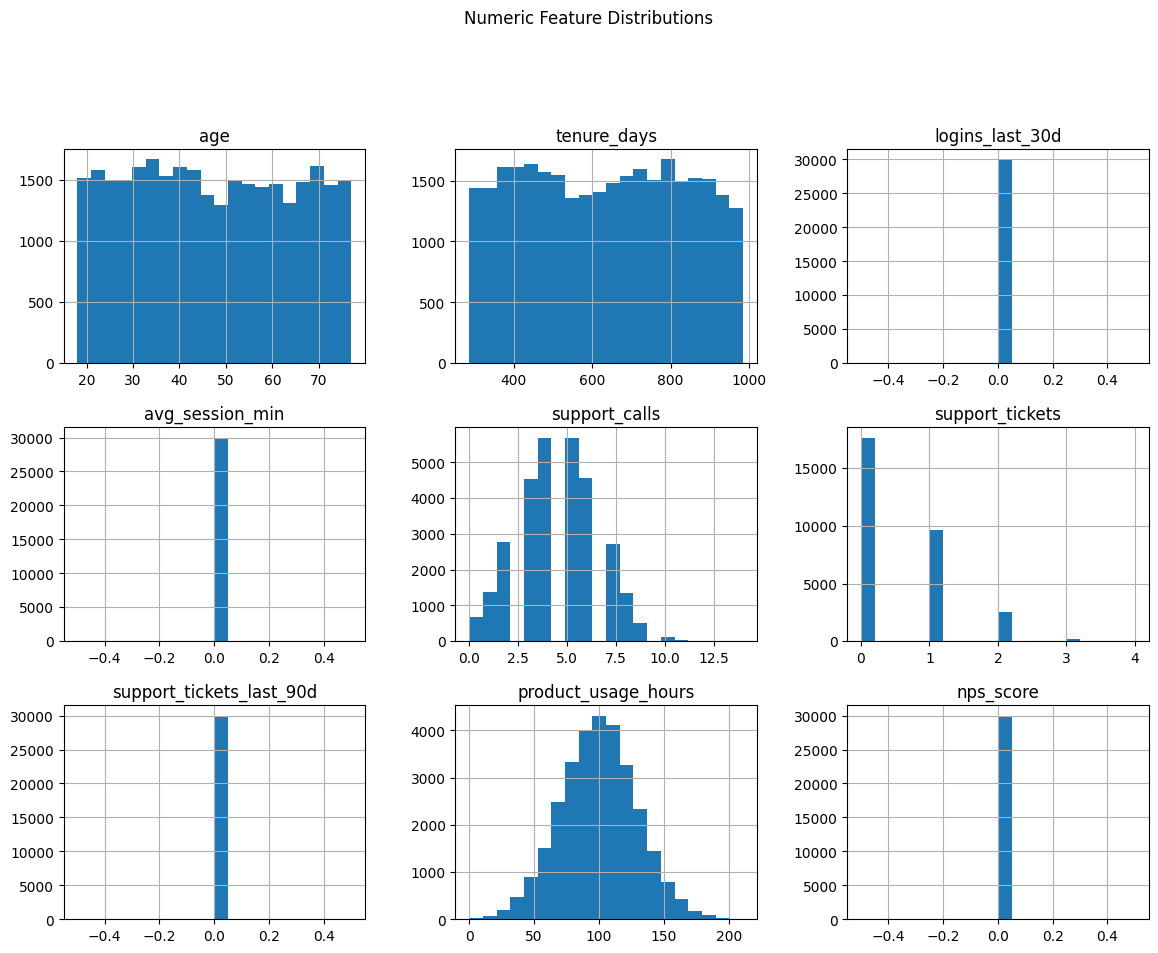

In [14]:
# patterns

num_cols = ["age", "tenure_days", "logins_last_30d",
            "avg_session_min", "support_calls",
            "support_tickets", "support_tickets_last_90d",
            "product_usage_hours", "nps_score"]

df[num_cols].hist(figsize=(14,10), bins=20)
plt.suptitle("Numeric Feature Distributions", y=1.02)


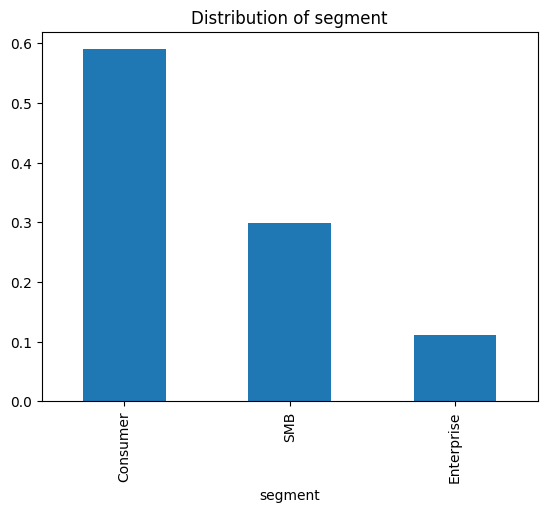

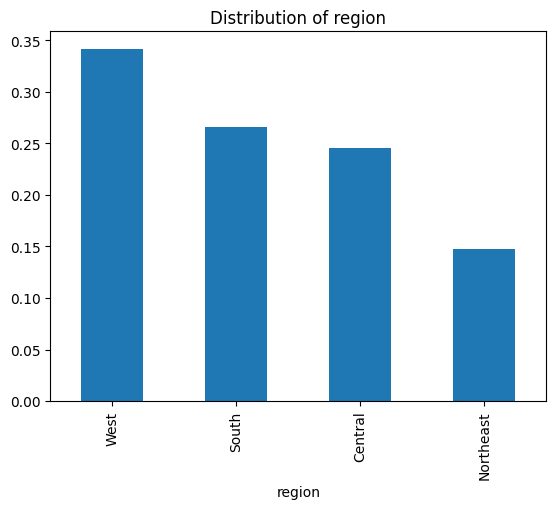

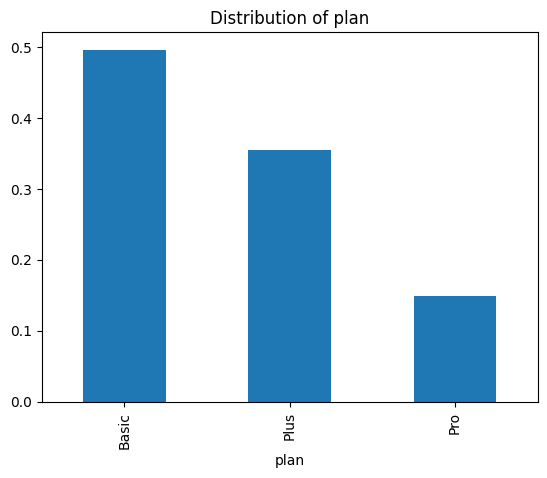

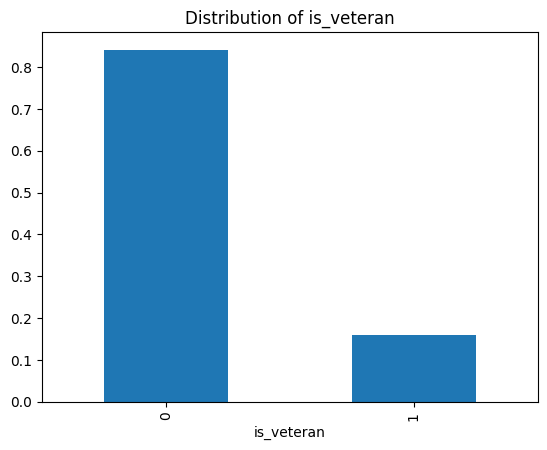

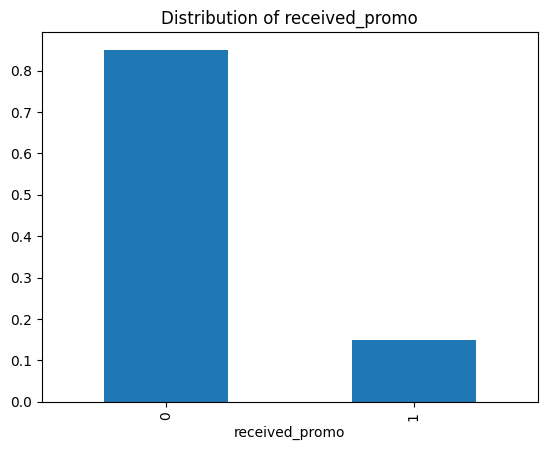

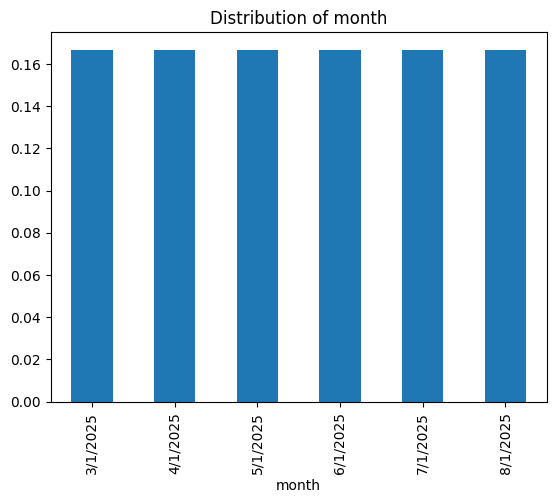

In [15]:
cat_cols = ["segment", "region", "plan", "is_veteran", "received_promo", "month"]

for col in cat_cols:
    df[col].value_counts(normalize=True).plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.show()


C:\Users\beall\AppData\Local\Temp\ipykernel_21396\1790295770.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("region")["churned"].mean().sort_values().plot(kind="bar")


Text(0.5, 1.0, 'Churn Rate by Region')

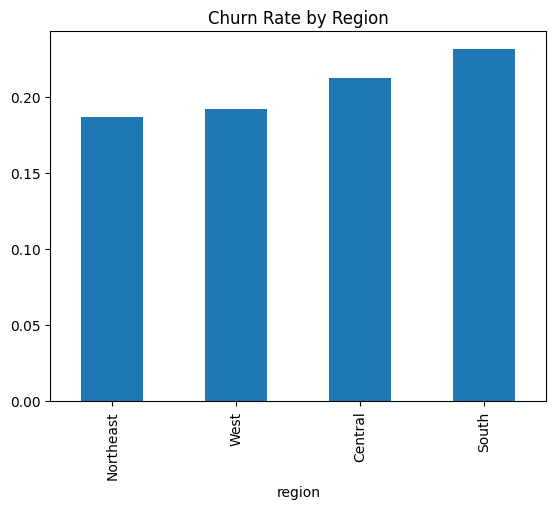

In [16]:
df.groupby("region")["churned"].mean().sort_values().plot(kind="bar")
plt.title("Churn Rate by Region")


Text(0.5, 1.0, 'Churn Rate by Segment')

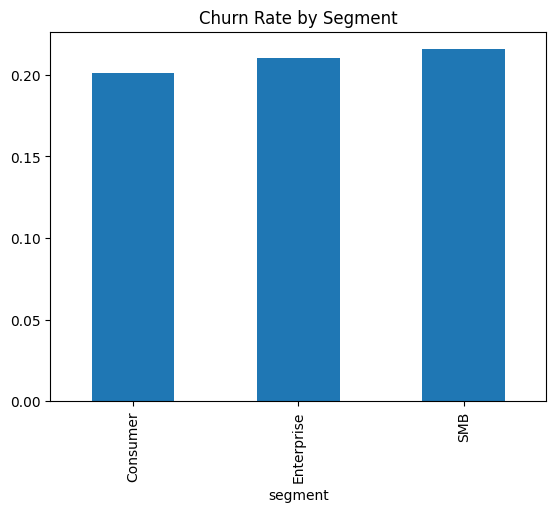

In [17]:
df.groupby("segment")["churned"].mean().sort_values().plot(kind="bar")
plt.title("Churn Rate by Segment")


Text(0.5, 1.0, 'Churn Rate by Plan')

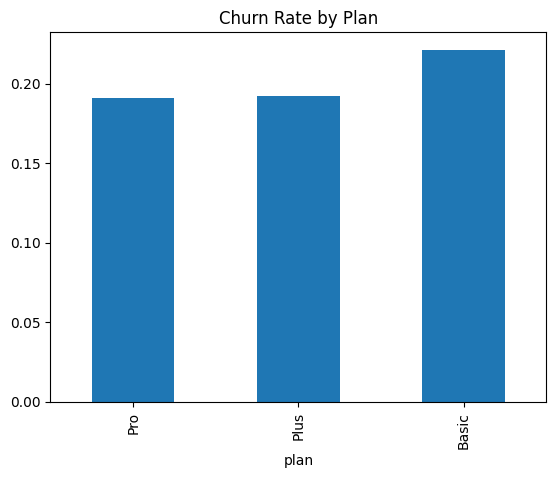

In [18]:
df.groupby("plan")["churned"].mean().sort_values().plot(kind="bar")
plt.title("Churn Rate by Plan")


C:\Users\beall\AppData\Local\Temp\ipykernel_21396\610971319.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_bucket")["churned"].mean().plot(kind="bar")


Text(0.5, 1.0, 'Churn Rate by Tenure Bucket')

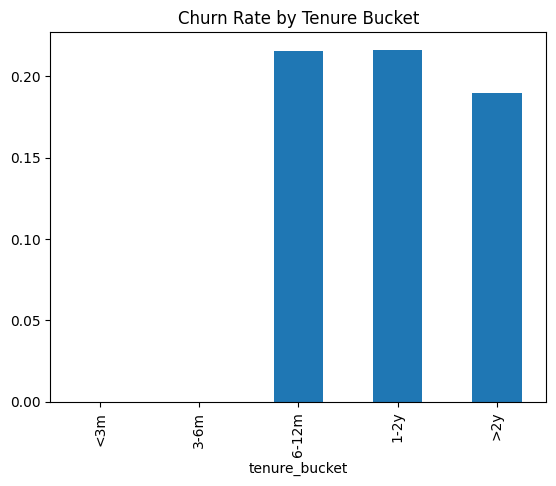

In [19]:
df["tenure_bucket"] = pd.cut(df["tenure_days"],
                             bins=[0,90,180,365,730,2000],
                             labels=["<3m","3-6m","6-12m","1-2y",">2y"])
df.groupby("tenure_bucket")["churned"].mean().plot(kind="bar")
plt.title("Churn Rate by Tenure Bucket")


Text(0.5, 1.0, 'Correlation Matrix with Churn')

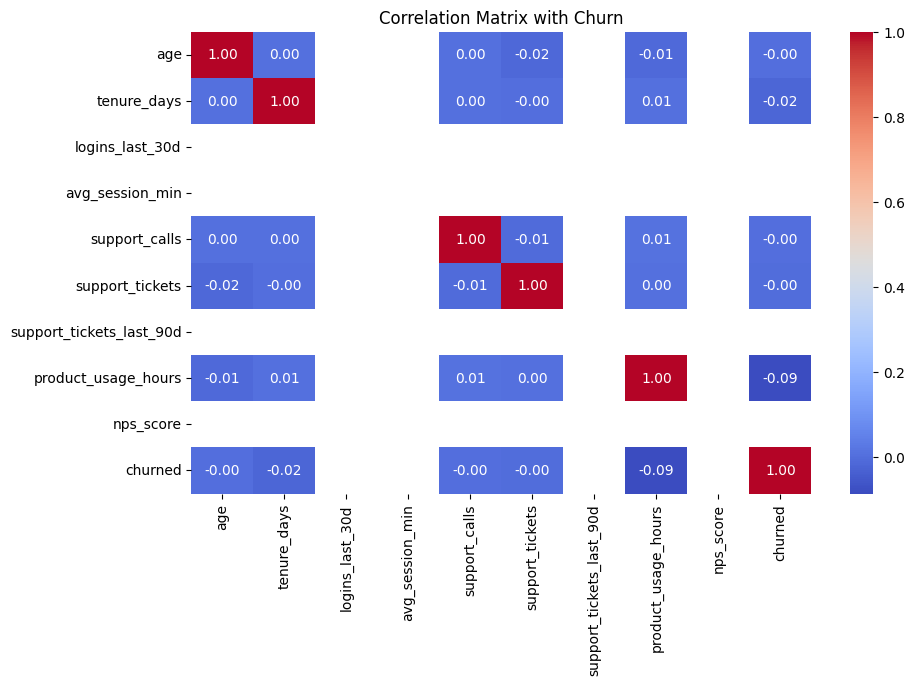

In [20]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ["churned"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Churn")


# Key EDA Insights — Customer Churn

### Churn Rate
- About **20.7% of customers churn** (roughly 1 in 5).
- Dataset is moderately imbalanced, so class balance should be considered in modeling.

### Demographics
- **Average age ≈ 47** (range 18–77).
- No strong skew; age alone may not be a dominant churn predictor.

### Segments, Plans, and Regions
- **Consumer** segment is largest (~59%).
- **Basic** plan is most common (~50%) and has **higher churn** compared to other plans.
- **Regional churn differences** suggest location influences customer retention.

### Tenure
- **Median tenure ≈ 21 months** (time since signup).
- **Early-tenure customers (<6 months) churn at 2× the rate** of longer-tenure customers.
- Indicates a critical period for onboarding and engagement.

### Customer Activity & Support
- **Support calls/tickets** positively correlated with churn → more issues = higher risk.
- **Product usage hours**: lower usage tends to link with higher churn, while consistent usage is protective.

### Promotions & NPS
- Only ~15% received promotions → opportunity for targeted retention offers.
- **NPS mostly zero** → likely missing or not tracked; may not be useful without better data.

---

### **Takeaway:**  
Churn is **highest in the first 6 months**, among **Basic-plan customers**, and for those with **high support activity and low usage**. Retention strategies should target **early-tenure customers** and **plans/regions with elevated churn**.


## Business Context
- Summarize the specific question this notebook answers.

## Data Loading & Preparation

## Analysis / Modeling

## Results & Visuals

## Takeaways / Next Steps